**Gustavo Dalri**

Este notebook lê dados de sensores simulados a partir de um arquivo CSV gerado no proprio código, analisa estatísticas (média, máximo, mínimo), identifica alertas e gera gráficos com visualização das leituras fora da faixa segura.
**Temperatura ideal: 18°C a 35°C** ; 
**Umidade ideal: 30% a 80%** 

In [4]:
import csv
import time
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Criando dicionáros

In [5]:
list_temp = []
list_umid = []
list_temp_high = []
list_temp_low = []
list_umid_high = []
list_umid_low = []

Criação randomica e armazenamento em lista dos dados a serem analizados

In [6]:
for i in range(20):
    time.sleep(0.5)

    temp = round(random.uniform(5,50),2)
    umid = round(random.uniform(0,100),2)

    list_temp.append(temp)
    list_umid.append(umid)

    if temp > 35:
        list_temp_high.append(temp)
    elif temp < 18:
        list_temp_low.append(temp)

    if umid > 80:
         list_umid_high.append(umid)
    elif umid < 30:
        list_umid_low.append(umid)
    
    print(f"Temperatura: {temp}°C\nUmidade: {umid}%")

Temperatura: 34.21°C
Umidade: 61.85%
Temperatura: 40.1°C
Umidade: 39.8%
Temperatura: 25.42°C
Umidade: 76.06%
Temperatura: 47.18°C
Umidade: 12.59%
Temperatura: 13.09°C
Umidade: 98.27%
Temperatura: 21.01°C
Umidade: 68.71%
Temperatura: 26.66°C
Umidade: 65.3%
Temperatura: 49.08°C
Umidade: 58.73%
Temperatura: 18.39°C
Umidade: 29.81%
Temperatura: 21.18°C
Umidade: 50.2%
Temperatura: 32.1°C
Umidade: 79.93%
Temperatura: 33.22°C
Umidade: 27.87%
Temperatura: 28.02°C
Umidade: 64.01%
Temperatura: 38.81°C
Umidade: 54.88%
Temperatura: 11.78°C
Umidade: 88.25%
Temperatura: 30.09°C
Umidade: 43.35%
Temperatura: 8.05°C
Umidade: 42.72%
Temperatura: 43.46°C
Umidade: 15.33%
Temperatura: 7.09°C
Umidade: 18.32%
Temperatura: 25.64°C
Umidade: 15.34%


Criação do arquivo .csv com os dados gerados

In [7]:
with open("LeiturasTempUmid.csv", "w", newline= "") as table:
    escritor = csv.writer(table)
    escritor.writerow(["Temperatura °C", "Umidade %"])

    for i in range(len(list_umid)):
        escritor.writerow([list_temp[i], list_umid[i]])

Cálculo da temperatura e umidade média e máximos e mínimos

In [8]:

temp_mean = round(sum(list_temp)/len(list_temp),2)
umid_mean = round(sum(list_umid)/len(list_umid),2)

df = pd.read_csv("LeiturasTempUmid.csv", encoding="cp1252")

Saída dos valores de máxima e minima, média, quantidade de valores acima ou abaixo do ideal

In [9]:
print("==== Relatório de Leituras ====")
print(f"Média da temperatura: {temp_mean}°C\n")
print(f"Média da umidade: {umid_mean}%\n\n")
print(f"Temperatura máxima: {df['Temperatura °C'].max()}°C\n")
print(f"Temperatura mínima: {df['Temperatura °C'].min()}°C\n\n")
print(f"Umidade máxima: {df['Umidade %'].max()}%\n")
print(f"Umidade mínima: {df['Umidade %'].min()}%\n\n")
print(f"Leituras fora da faixa:")     
print(f"- Temperatura acima de 35°C: {len(list_temp_high)}\n") 
print(f"- Umidade abaixo de 30%: {len(list_umid_low)}")

==== Relatório de Leituras ====
Média da temperatura: 27.73°C

Média da umidade: 50.57%


Temperatura máxima: 49.08°C

Temperatura mínima: 7.09°C


Umidade máxima: 98.27%

Umidade mínima: 12.59%


Leituras fora da faixa:
- Temperatura acima de 35°C: 5

- Umidade abaixo de 30%: 6


Gráfico com destaque nos pontos fora do ideal

In [10]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperatura °C  20 non-null     float64
 1   Umidade %       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


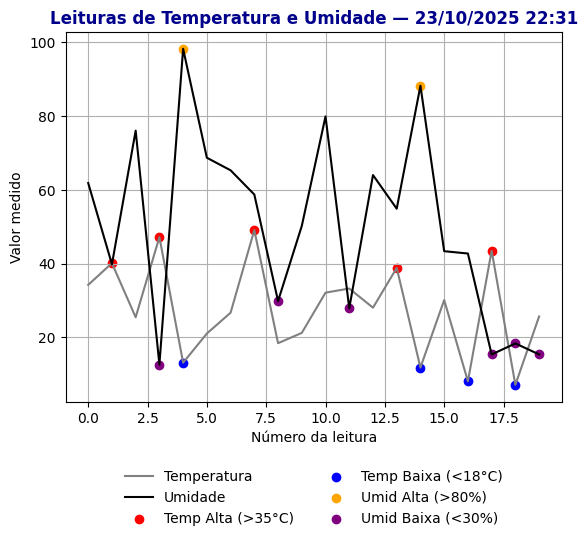

In [11]:
_=df["Temperatura °C"].plot(kind="line", color="gray", label="Temperatura")
_=df["Umidade %"].plot(kind="line", color="black", label="Umidade")
plt.title("Temperatura e umidade")

altas_temp = df[df["Temperatura °C"] > 35]
baixas_temp = df[df["Temperatura °C"] < 18]
altas_umid = df[df["Umidade %"] > 80]
baixas_umid = df[df["Umidade %"] < 30]

plt.scatter(altas_temp.index, altas_temp["Temperatura °C"], color="red", label="Temp Alta (>35°C)")
plt.scatter(baixas_temp.index, baixas_temp["Temperatura °C"], color="blue", label="Temp Baixa (<18°C)")
plt.scatter(altas_umid.index, altas_umid["Umidade %"], color="orange", label="Umid Alta (>80%)")
plt.scatter(baixas_umid.index, baixas_umid["Umidade %"], color="purple", label="Umid Baixa (<30%)")

from datetime import datetime
agora = datetime.now().strftime("%d/%m/%Y %H:%M")
plt.title(f"Leituras de Temperatura e Umidade — {agora}", fontsize=12, fontweight="bold", color="darkblue")

plt.xlabel("Número da leitura")
plt.ylabel("Valor medido")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.grid(True)
plt.show()
